# Project: Аnalysis of the online resource "Culture"

## Stage 1: Data preparation

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import rcParams

In [2]:
# read csv files
visits = pd.read_csv('./visits_log.csv')
orders = pd.read_csv('./orders_log.csv')
costs = pd.read_csv('./costs.csv')

In [3]:
# check and modify the information in the file 'visits'
# change the column format
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
# check the common info about data set
visits.info()
print('')
print('------------------------')
# check duplicates
print('number of duplicates: ',len(orders[orders.duplicated()]))
visits.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null datetime64[ns]
Source Id    359400 non-null int64
Start Ts     359400 non-null datetime64[ns]
Uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB

------------------------
number of duplicates:  0


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527


*Device — user device category <br>
End Ts — date and time of the session end <br>
Source Id — identifier of the advertising source from which the user came <br>
Start Ts — date and time of session star <br>
Uid — unique user ID <br>*

In [4]:
# check and modify the information in the file 'orders'
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
orders.info()
print('')
print('------------------------')
print('number of duplicates: ',len(orders[orders.duplicated()]))
orders.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null datetime64[ns]
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB

------------------------
number of duplicates:  0


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844


*Buy Ts - date and time of order <br>
Revenue - "Culture's" revenue from this order <br>
Uid - unique id of the user who made the order <br>*

In [5]:
# check and modify the information in the file 'costs'
costs['dt'] = pd.to_datetime(costs['dt'])
costs.info()
print('')
print('------------------------')
print('number of duplicates: ',len(costs[costs.duplicated()]))
costs.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB

------------------------
number of duplicates:  0


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53


*source_id —  ID of  advertising sourse <br>
dt — date <br>
costs — spending of this advertising sourse on that date*

#### The data is ready for the further analysis: no duplicates or NaN values.  The format of columns are correct, except for the date columns that have changed.

## Stage 2. Building a report and calculating metrics

### Analysis of PRODUCT
*How many people use the product per day, week, month?<br>
How many sessions per day?<br>
How long is the session?<br>
How often do people come back?*

In [6]:
# add additional columns with date, week, month, year
visits['date'] = visits['Start Ts'].dt.date
visits['week'] = visits['Start Ts'].dt.week
visits['month'] = visits['Start Ts'].dt.month
visits['year'] = visits['Start Ts'].dt.year
visits.head(3)

,Device,End Ts,Source Id,Start Ts,Uid,date,week,month,year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017


In [7]:
# calculate values for  future calculations
print('number of months in the period under review: ', visits['month'].value_counts().shape[0])
print('number of weeks in the period under review: ', visits['week'].value_counts().shape[0])
print('number of days in the period under review: ', visits['date'].value_counts().shape[0])

number of months in the period under review:  12
number of weeks in the period under review:  52
number of days in the period under review:  364


**Number of unique users per day**

In [8]:
visits.groupby('date').agg({'Uid': 'nunique'}).mean()

Uid    907.991758
dtype: float64

****Number of unique users per week****

In [9]:
visits.groupby('week').agg({'Uid': 'nunique'}).mean()

Uid    5825.288462
dtype: float64

**Number of unique users per month**

In [10]:
visits.groupby('month').agg({'Uid': 'nunique'}).mean()

Uid    23228.416667
dtype: float64

**Number of sessions per day**

In [11]:
visits.groupby('date').agg({'Uid': 'count'}).mean()

Uid    987.362637
dtype: float64

**Calculate the one session duration**

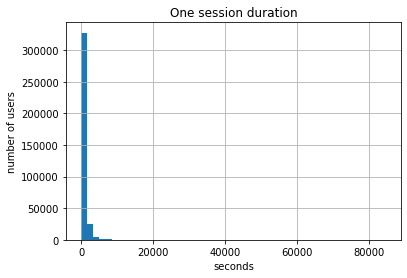

In [12]:
# add additional column with session duration in seconds
visits['session_duration_sec'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds
# build histogram
visits['session_duration_sec'].hist(bins = 50)
plt.title('One session duration')
plt.xlabel('seconds')
plt.ylabel('number of users')
plt.show()

In [13]:
# Look at min, max, mean and median values in session duration
visits['session_duration_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

##### We can see on the histogram the distribution is not normal. There are abnormal values, which have a significant impact on the average value. The better way to calculate mode value (the most frequent value)

In [14]:
print('mean duration, sec: ', visits['session_duration_sec'].mean())
print('median duration, sec: ', visits['session_duration_sec'].median())
print('mode duration, sec: ', visits['session_duration_sec'].mode())

mean duration, sec:  643.506488592098
median duration, sec:  300.0
mode duration, sec:  0    60
dtype: int64


**Perform the analysis how often people return: Retention Rate**

In [15]:
# Form a cohort on the first activity in the website 
first_activity_date = visits.groupby(['Uid'])['Start Ts'].min()
first_activity_date.name = 'first_activity_date'
visits = visits.join(first_activity_date, on = 'Uid')

In [16]:
# extract from date in columns 'Start Ts' and 'first_activity_date' month
visits['order_month'] = visits['Start Ts'].astype('datetime64[M]')
visits['first_order_month'] = visits['first_activity_date'].astype('datetime64[M]')

In [17]:
# For each row of the dataframe, calculate the user lifetime within the cohort
visits['cohort_lifetime'] = visits['order_month'] - visits['first_order_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].astype('int')
visits.head(3)

,Device,End Ts,Source Id,Start Ts,Uid,date,week,month,year,session_duration_sec,first_activity_date,order_month,first_order_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0


In [18]:
# Group data by 'cohort' and 'cohort_lifetime'.
# Calculate the number of active users for a certain "month of life"
cohorts = visits.groupby(
    ['first_order_month','cohort_lifetime']).agg({'Uid':'nunique'}).reset_index()
cohorts.head()

,first_order_month,cohort_lifetime,Uid
0,2017-06-01,0,13259
1,2017-06-01,2,713
2,2017-06-01,3,814
3,2017-06-01,4,909
4,2017-06-01,5,947


In [19]:
# Find the initial number of users for each cohort. This is a number of users in zero week
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_order_month','Uid']]
initial_users_count.head(3)

,first_order_month,Uid
0,2017-06-01,13259
10,2017-07-01,13140
19,2017-08-01,10181


In [20]:
# change the column name from Uid to initial_users_count
initial_users_count = initial_users_count.rename(columns={'Uid':'cohort_users'})
initial_users_count.head(3)

,first_order_month,cohort_users
0,2017-06-01,13259
10,2017-07-01,13140
19,2017-08-01,10181


In [21]:
# Add initial number of user in cohorts table
cohorts = cohorts.merge(initial_users_count, on='first_order_month')
cohorts['first_order_month'] = cohorts['first_order_month'].dt.date
cohorts.head(3)

,first_order_month,cohort_lifetime,Uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,2,713,13259
2,2017-06-01,3,814,13259


In [22]:
# Calculate Retention Rate
cohorts['retention'] = cohorts['Uid']/cohorts['cohort_users']
cohorts.head(3)

,first_order_month,cohort_lifetime,Uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,2,713,13259,0.053775
2,2017-06-01,3,814,13259,0.061392


In [23]:
# Create pivot table 
retention_pivot = cohorts.pivot_table(index='first_order_month',
                                      columns='cohort_lifetime',values='retention',
                                      aggfunc='sum')

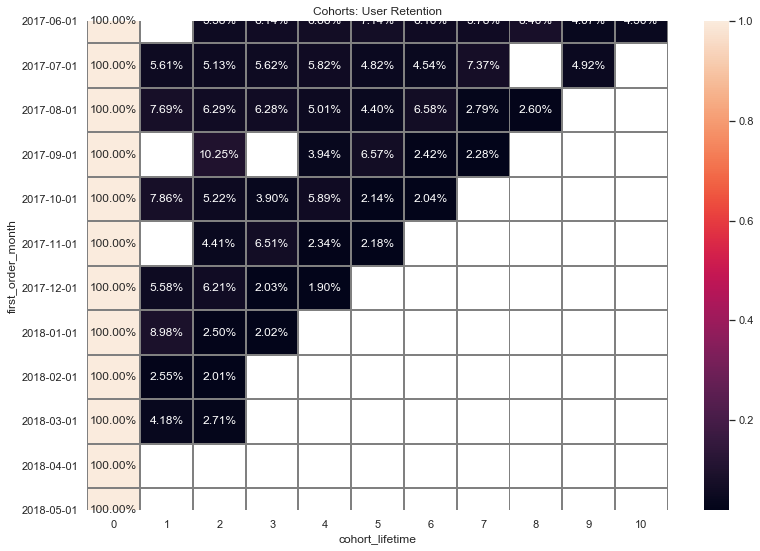

In [24]:
# Build heatmap
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.2%', linewidths=1, linecolor='gray');

### Сonclusions: 
 - Number of unique users per day:  908
 - Number of unique users per week:  5825
 - Number of unique users per month:  23228
 - Mean number of session per day:  987
 - Mean session duration :  300 sec
 - Moad session duration:  60 sec
 - Retention Rate:  1,9% - 10,0%. (*These are very low values, which means that most of the clients are leaving irretrievably. Also, in the latter cohorts, there is a significant  Retention Rate decrease to 2%. This may indicate that the effectiveness of marketing advertising decreases over time.*)

### SALES analysis
*When do people start buying? <br>
How many times are purchased per period? <br>
What is the average check? <br>
How much money do they bring? (LTV)*

In [25]:
orders.info()
orders.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null datetime64[ns]
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844


**When do people start buying?**

In [26]:
# add information about first visit in 'orders' table
orders_new = pd.merge(orders, visits[['Uid','first_activity_date']], on='Uid', how='left')
orders_new = orders_new.drop_duplicates().reset_index(drop=True)
orders_new.head(3)

,Buy Ts,Revenue,Uid,first_activity_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00


In [27]:
# посчитаем, через сколько дней после первого визита делали первый заказ
orders_new['first_order'] = (orders_new['Buy Ts'] - orders_new['first_activity_date']).dt.days

orders_new_pivot = orders_new.pivot_table(index = 'first_order', values = 'Uid', 
                 aggfunc = 'count').sort_values(by='Uid',ascending = False).reset_index()

#orders_new_pivot
print('The number of clients who made an order on the day of the visit: ', orders_new_pivot.loc[0,'Uid'])
print('Total number of clients: ', orders_new_pivot['Uid'].sum())

The number of clients who made an order on the day of the visit:  28103
Total number of clients:  50415


In [28]:
print('Percentage of orders made on the first day of registration: {:.1%}'. format(
    orders_new_pivot.loc[0,'Uid']/orders_new_pivot['Uid'].sum()))

Percentage of orders made on the first day of registration: 55.7%


##### The majority of users - 55.7%, make the first order on the first day of visiting the site.

**How many times are purchased per period? **

In [29]:
# calculate total revenue
print('Total revenue is: {:.1f} '. format(orders['Revenue'].sum()))

Total revenue is: 252057.2 


In [30]:
# Number of purchases per client per year
orders_by_period = orders_new.pivot_table(index = 'Uid',values = 'Revenue',aggfunc = 'count'
                            ).sort_values(by='Revenue',ascending = False).reset_index()
orders_by_period.columns = ['Uid','count_of_orders']
orders_by_period['by_month'] = orders_by_period['count_of_orders']/12
orders_by_period['by_week'] = orders_by_period['count_of_orders']/52
orders_by_period['by_day'] = orders_by_period['count_of_orders']/364


print('Avarage number of purchases per user per: ')
print('year : {:.2f}'. format(orders_by_period['count_of_orders'].mean()))
print('month : {:.2f}'. format(orders_by_period['by_month'].mean()))
print('week : {:.2f}'. format(orders_by_period['by_week'].mean()))
print('day : {:.3f}'. format(orders_by_period['by_day'].mean()))

Avarage number of purchases per user per: 
year : 1.38
month : 0.12
week : 0.03
day : 0.004


**What is the average check?**

In [31]:
orders_by_period_revenue = orders_new.pivot_table(index = 'Uid',values = 'Revenue',aggfunc = 'sum'
                            ).sort_values(by='Revenue',ascending = False).reset_index()
orders_by_period_revenue['by_month'] = orders_by_period_revenue['Revenue']/12
orders_by_period_revenue['by_week'] = orders_by_period_revenue['Revenue']/52
orders_by_period_revenue['by_day'] = orders_by_period_revenue['Revenue']/364

print('Avarage check per user per: ')
print('year : {:.2f}'. format(orders_by_period_revenue['Revenue'].mean()), 'y.e.')
print('month : {:.2f}'. format(orders_by_period_revenue['by_month'].mean()), 'y.e.')
print('week : {:.2f}'. format(orders_by_period_revenue['by_week'].mean()), 'y.e.')
print('day : {:.3f}'. format(orders_by_period_revenue['by_day'].mean()), 'y.e.')

Avarage check per user per: 
year : 6.90 y.e.
month : 0.58 y.e.
week : 0.13 y.e.
day : 0.019 y.e.


**How much money do client bring? (LTV)**

##### Form monthly cohorts by the month of the first purchase

In [32]:
# add the column 'order_month'
orders['order_month'] = orders['Buy Ts'].astype('datetime64[M]')
orders.head(3)

,Buy Ts,Revenue,Uid,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01


In [33]:
#    find the month with a first purchase 
first_orders = orders.groupby('Uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['Uid', 'first_order_month']
first_orders.head(3)

,Uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01


In [34]:
#  Count the number of users (n_buyers) per each month:
cohort_sizes = first_orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head(3)

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370


In [35]:
# Create cohorts. Add month of first purchase for each user to 'orders' table.
orders_new_2 = pd.merge(orders, first_orders, on='Uid')
orders_new_2.head(3)

,Buy Ts,Revenue,Uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01


In [36]:
#  Group 'orders' table by month of the first purchase and month of each order
cohorts = orders_new_2.groupby(['first_order_month','order_month']
                            ).agg({'Revenue': 'sum'}).reset_index()
cohorts.head(3)

,first_order_month,order_month,Revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34


In [37]:
# Add information about how many people made a purchase for the first time in each month
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head(3)

,first_order_month,n_buyers,order_month,Revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34


In [38]:
# LTV считают из валовой прибыли, но поскольку маржинальность нам не известна, примем ее за единицу. 
# Соответственно валовая прибыль = выручке
# Find the 'age' of cohorts 
report['age'] = (report['order_month'] - report['first_order_month'])/np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['first_order_month'] = report['first_order_month'].dt.normalize()
report.head(3)

,first_order_month,n_buyers,order_month,Revenue,age
0,2017-06-01,2023,2017-06-01,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,2


In [39]:
# calculate LTV
report['ltv'] = report['Revenue'] / report['n_buyers']

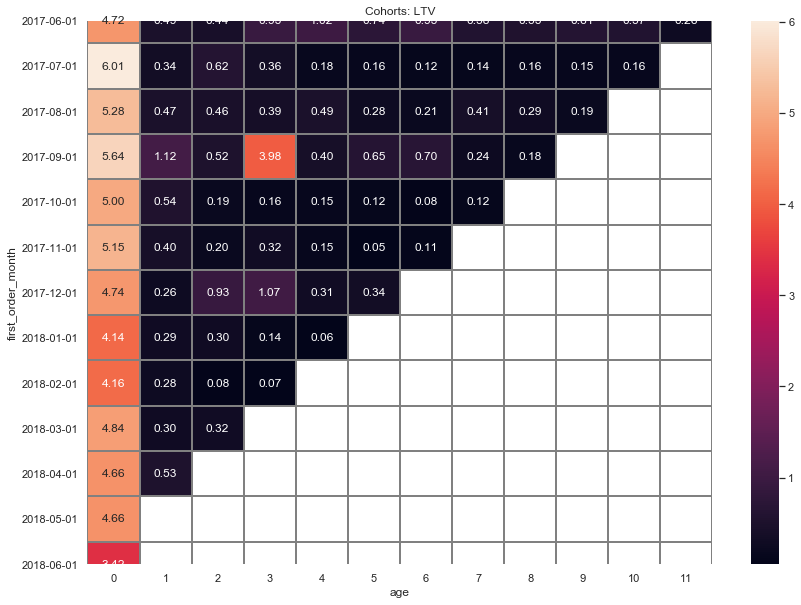

In [40]:
# create heatmap
report['first_order_month'] = report['first_order_month'].dt.date

output = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(2)

sns.set(style='white')
plt.figure(figsize=(14, 10))
plt.title('Cohorts: LTV')
sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='gray');

In [41]:
# Calculate cumulative LTV for 6 month for the first 7 cohorts 
output['ltv'] = output[range(0,6)].sum(axis = 1)
output.fillna('').head(7)

age,0,1,2,3,4,5,6,7,8,9,10,11,ltv
first_order_month,,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26,8.36
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,,7.67
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,,,7.37
2017-09-01,5.64,1.12,0.52,3.98,0.4,0.65,0.7,0.24,0.18,,,,12.31
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,,,,,6.16
2017-11-01,5.15,0.4,0.2,0.32,0.15,0.05,0.11,,,,,,6.27
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,,,,,,,7.65


### Сonclusions: 
- Total revenue for the entire period: 252057 y.e.
- Most of users - 55.7%, make their first purchase on the first day of visiting the site
- Average number of purchases per one user for:
     - year : 1.38
     - month : 0.12
     - week : 0.03
     - day : 0.004
 - Average revenue per one user for:
     - year : 6.90 y.e.
     - month : 0.58 y.e.
     - week : 0.13 y.e.
     - day : 0.019 y.e.
 - LTV for 6 monthes
     - 1st cohort:  4.72 y.e. 
     - 2nd cohort:  6.01 y.e. 
     - 3rd cohort:  5.28 y.e. 
     - 4th cohort:  5.64 y.e. 
     - 5th cohort:  5.00 y.e.  
     - 6th cohort:  5.15 y.e. 
     - 7th cohort:  4.74 y.e. 
     
     
*(that is, on average, each customer brings +/- (5 y.e.) revenue for 6 months of "life". Starting from the second cohort, there is a tendency towards a decrease in accumulated LTV)*

### Marketing
*How much money was spend? Total / per source / by time <br>
How much did it cost to get one customer from each source? (CAC) <br>
How much have the costs paid off? (ROI)* <br>

***How much money was spend? Total / per source / by time <br>**

In [42]:
print('money spent in a year: ', costs['costs'].sum())
print('------------------------------')
print('money spent from the perspective by source')
print(costs.groupby(['source_id'])['costs'].sum())

# add the month of the cost incurred
costs['dt_month'] = costs['dt'].astype('datetime64[M]')
print('------------------------------')
print('money spent by month: ')
monthly_costs = costs.groupby('dt_month').sum()
print(monthly_costs)

money spent in a year:  329131.62
------------------------------
money spent from the perspective by source
source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64
------------------------------
money spent by month: 
            source_id     costs
dt_month                       
2017-06-01       1020  18015.00
2017-07-01       1054  18240.59
2017-08-01       1054  14790.54
2017-09-01       1020  24368.91
2017-10-01       1054  36322.88
2017-11-01       1020  37907.88
2017-12-01       1054  38315.35
2018-01-01       1054  33518.52
2018-02-01        952  32723.03
2018-03-01       1025  30415.27
2018-04-01        986  22289.38
2018-05-01       1054  22224.27


**How much did it cost to get one customer from each source?  (CAC)**

In [43]:
costs_source = costs.pivot_table(
        index='source_id',
        values='costs', 
        aggfunc = 'sum').round(2).reset_index()
costs_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [44]:
# Calculate the number of users per each source
visits_source = visits.groupby('Source Id').agg({'Uid': 'nunique'}).reset_index()
visits_source.columns = ['source_id', 'n_users']
visits_source

,source_id,n_users
0,1,18999
1,2,26245
2,3,74756
3,4,83525
4,5,56974
5,6,6
6,7,34
7,9,9264
8,10,8067


**Customer Acquisition Cost by source**

In [45]:
cac = costs_source.merge(visits_source, on = 'source_id', how = 'outer')
cac['cac'] = cac['costs']/cac['n_users']
cac

,source_id,costs,n_users,cac
0,1,20833.27,18999,1.096546
1,2,42806.04,26245,1.631017
2,3,141321.63,74756,1.890439
3,4,61073.60,83525,0.731201
4,5,51757.10,56974,0.908434
5,9,5517.49,9264,0.595584
6,10,5822.49,8067,0.721766
7,6,NaN,6,NaN
8,7,NaN,34,NaN


**Customer Acquisition Cost in terms of cohorts**

In [46]:
# group costs by month
cohort_by_month = costs.groupby('dt_month').agg({'costs': 'sum'}).reset_index()
cohort_by_month.head(3)

,dt_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54


In [47]:
# Calculate the number of users in each cohorts
cohort_users = (report[['first_order_month','n_buyers']
                      ][report['age'] == 0]).reset_index().drop('index', axis = 1)
cohort_users['first_order_month'] = pd.to_datetime(cohort_users['first_order_month'])
cohort_users.head(3)

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370


In [48]:
# merge the table
cac = cohort_by_month.merge(cohort_users, how = 'left', left_on = 'dt_month', 
                            right_on = 'first_order_month').drop('first_order_month',axis = 1)
# calculate the CAC for each cohorts
cac['cac'] = cac['costs']/cac['n_buyers']
cac.head()

,dt_month,costs,n_buyers,cac
0,2017-06-01,18015.00,2023,8.905091
1,2017-07-01,18240.59,1923,9.485486
2,2017-08-01,14790.54,1370,10.796015
3,2017-09-01,24368.91,2581,9.441654
4,2017-10-01,36322.88,4340,8.369327


**Calculate ROMI for the first 7 cohorts by 6 monthes**

In [49]:
output = output.reset_index()
output['first_order_month'] = pd.to_datetime(output['first_order_month'])

romi = cac.merge(output[['first_order_month','ltv']], how = 'left',
                 left_on = 'dt_month', right_on = 'first_order_month'
                ).drop('first_order_month',axis = 1).head(7)
romi['romi'] = romi['ltv']/romi['cac']
romi

,dt_month,costs,n_buyers,cac,ltv,romi
0,2017-06-01,18015.00,2023,8.905091,8.36,0.938789
1,2017-07-01,18240.59,1923,9.485486,7.67,0.808604
2,2017-08-01,14790.54,1370,10.796015,7.37,0.682659
3,2017-09-01,24368.91,2581,9.441654,12.31,1.303797
4,2017-10-01,36322.88,4340,8.369327,6.16,0.736021
5,2017-11-01,37907.88,4081,9.288870,6.27,0.675001
6,2017-12-01,38315.35,4383,8.741809,7.65,0.875105


**Calculate cumulative ROMI to understand from which month the return on investment begins**

In [50]:
report['first_order_month'] = pd.to_datetime(report['first_order_month'])
monthly_costs = monthly_costs.reset_index()

report_new = report.merge(monthly_costs, left_on='first_order_month', right_on='dt_month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new['first_order_month'] = report_new['first_order_month'].dt.date
report_new.head()

,first_order_month,n_buyers,order_month,Revenue,age,ltv,dt_month,source_id,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,2017-06-01,1020,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,2017-06-01,1020,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,2017-06-01,1020,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,2017-06-01,1020,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,2017-06-01,1020,18015.0,8.905091


In [51]:
report_new['romi'] = report_new['ltv'] / report_new['cac']
output = report_new.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')

output = output.cumsum(axis=1).round(2)

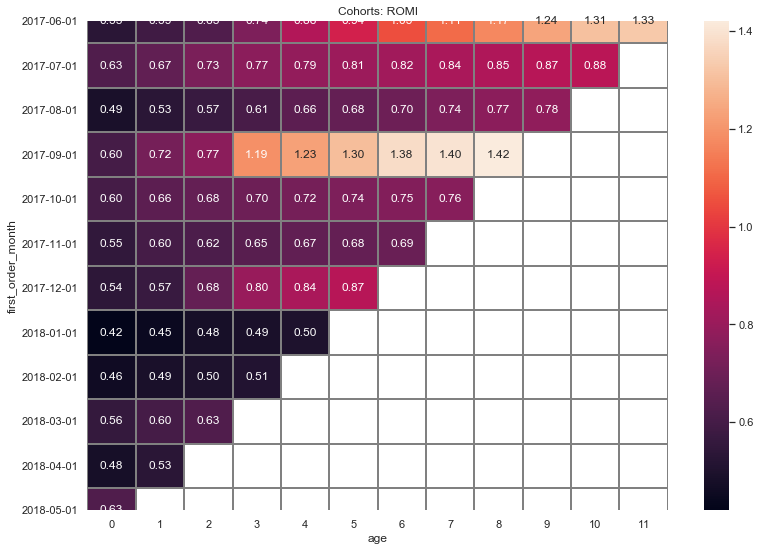

In [52]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: ROMI')
sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='gray');

**Let's see if there was a significant change in the distribution of the marketing budget (depending on the source) in the "leading" 4th cohort '2017-09-01'**

In [53]:
cost_source_month = costs.groupby(['dt_month','source_id']).agg({'costs': 'sum'}
                                                               ).reset_index()
cost_source_month['dt_month'] = cost_source_month['dt_month'].dt.date

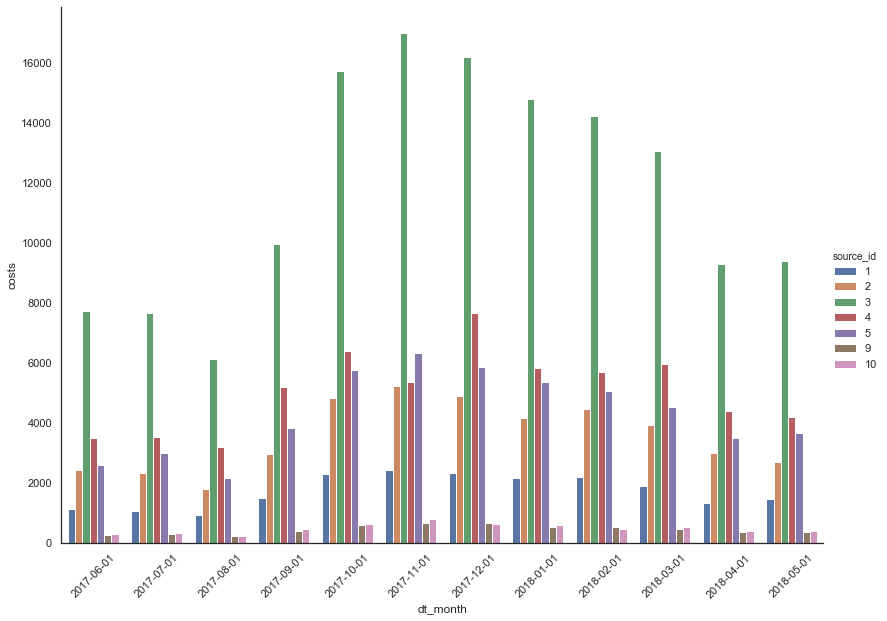

In [54]:
ax = sns.catplot(x='dt_month', y='costs', hue='source_id', kind='bar', 
                data = cost_source_month, height=8.27, aspect=11.7/8.27)
ax.set_xticklabels(rotation=45);

**Budget distribution in 4th cohort '2017-09-01' does not differ significantly from other cohorts. In addition, the increase in the budget is observed only from the next cohort**

##### The behavior of seven cohorts was studied over 6 months. Only one cohort '2019-09-01' showed return on investment by 4th month  (which is December) and the first cohort ('2017-06-01') by 7th month (which is December as well) <br> Thus , the return on investment occurred during the seasonal peak of sales, and therefore, it is not advisable to take these results into account.

### CONCLUSION: 
#### The project 'Cultura' doesn't pay off in general.

#### The only two cohorts,  which begin to pay off from 4th and 7th month. Moreover, the month of the beginning of return of investment is December. This is a traditional time for increasing spending to gifts and entertainment.

#### In my opinion, it is possible to identify 2 main reasons of "non-profitability" of the project.
- Low profit from each purchase (some purchases have zero profit, more than 90% of purchases bring profit less than  10 y.e. from each purchase)
- Low Retention Rate: 1.9% - 9.0%.
- Average number of purchases made by user per year: 1.38. That's mean, most buyers make a purchase only once a year.
   
#### Thus, I recommend targeting an ad campaign to customer retention. <br> It might be a choosing and mailing of thematic events for clients or offer a bonus system for repeated purchase.